# Scripts for Biopython Article on Medium

## Libraries to Import

In [25]:
from IPython.core.display import Image
from Bio.Seq import Seq
from Bio.SeqUtils import GC

from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

## Sequencing Methods

In [26]:
my_seq = Seq("AGTCC")

In [27]:
my_seq

Seq('AGTCC')

In [28]:
my_seq.complement()

Seq('TCAGG')

In [29]:
my_seq.reverse_complement()

Seq('GGACT')

In [30]:
len(my_seq)

5

In [31]:
for bp in my_seq:
    print(bp)

A
G
T
C
C


In [32]:
small = my_seq[1:4]
small

Seq('GTC')

In [33]:
GC(my_seq)

60.0

In [34]:
seq = Seq('ACTG')
seq.complement()

Seq('TGAC')

In [35]:
coding = Seq('ATGTAG')

In [36]:
template = coding.reverse_complement()

In [37]:
template.reverse_complement().transcribe()

Seq('AUGUAG')

In [38]:
coding.transcribe()

Seq('AUGUAG')

## Bubonic Plague Avirulent Strain Visualization

In [40]:
record = SeqIO.read("NC_005816.gb", "genbank")

gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
        feature, sigil="ARROW", color=color, label=True, label_size=14, label_angle=0
    )

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
    ("CCCGGG", "SmaI", colors.orange),
    ("AAGCTT", "HindIII", colors.red),
    ("GGATCC", "BamHI", colors.purple)]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(FeatureLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=10,
            label_color=color,
        )
        index += len(site)

gd_diagram.draw(
    format="circular",
    circular=True,
    pagesize=(20 * cm, 20 * cm),
    start=0,
    end=len(record),
    circle_core=0.5)

gd_diagram.write("plasmid_circular_nice1.png", "PNG")

RuntimeError: This installation of reportLab has neither RLPYCAIRO or RLRENDERPM extras installed.
It cannot create paths from text.
Could not create text2PathDescription for using backends from ('freetype', '_renderPM')

In [20]:
Image("plasmid_circular_nice1.png")

FileNotFoundError: No such file or directory: 'plasmid_circular_nice1.png'

FileNotFoundError: No such file or directory: 'plasmid_circular_nice1.png'

<IPython.core.display.Image object>

## Thale Cress Chloroplast Genome

In [21]:
record = SeqIO.read("NC_000932.gb", "genbank")

gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
        feature, sigil="ARROW", color=color, label=True, label_size=14, label_angle=0
    )

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
#     ("CCCGGG", "SmaI", colors.orange),
#     ("AAGCTT", "HindIII", colors.red),
#     ("GGATCC", "BamHI", colors.purple),
]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(FeatureLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=5,
            label_color=color,
        )
        index += len(site)

gd_diagram.draw(format="linear", pagesize="A4", fragments=4, start=0, end=len(record))
# gd_diagram.write("plasmid_linear_nice.svg", "SVG")

gd_diagram.draw(
    format="circular",
    circular=True,
    pagesize=(20 * cm, 20 * cm),
    start=0,
    end=len(record),
    circle_core=0.5)

gd_diagram.write("plasmid_circular_nice2.png", "PNG")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 5-6: malformed \N character escape (594351641.py, line 1)

In [22]:
Image("plasmid_circular_nice2.png")

FileNotFoundError: No such file or directory: 'plasmid_circular_nice2.png'

FileNotFoundError: No such file or directory: 'plasmid_circular_nice2.png'

<IPython.core.display.Image object>

## Covid-19 Base Genome

In [19]:
record = SeqIO.read("NC_045512.2.fna", "fasta")

gd_diagram = GenomeDiagram.Diagram(record.id)
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    if feature.type != "gene":
        # Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(
        feature, sigil="ARROW", color=color, label=True, label_size=14, label_angle=0
    )

# I want to include some strandless features, so for an example
# will use EcoRI recognition sites etc.
for site, name, color in [
    ("GAATTC", "EcoRI", colors.green),
    ("CCCGGG", "SmaI", colors.orange),
    ("AAGCTT", "HindIII", colors.red),
    ("GGATCC", "BamHI", colors.purple),
]:
    index = 0
    while True:
        index = record.seq.find(site, start=index)
        if index == -1:
            break
        feature = SeqFeature(FeatureLocation(index, index + len(site)))
        gd_feature_set.add_feature(
            feature,
            color=color,
            name=name,
            label=True,
            label_size=5,
            label_color=color,
        )
        index += len(site)

gd_diagram.draw(format="linear", pagesize="A4", fragments=4, start=0, end=len(record))
gd_diagram.write("covid.png", "PNG")

# gd_diagram.draw(
#     format="circular",
#     circular=True,
#     pagesize=(20 * cm, 20 * cm),
#     start=0,
#     end=len(record),
#     circle_core=0.5)

# gd_diagram.write("covid.png", "PNG")

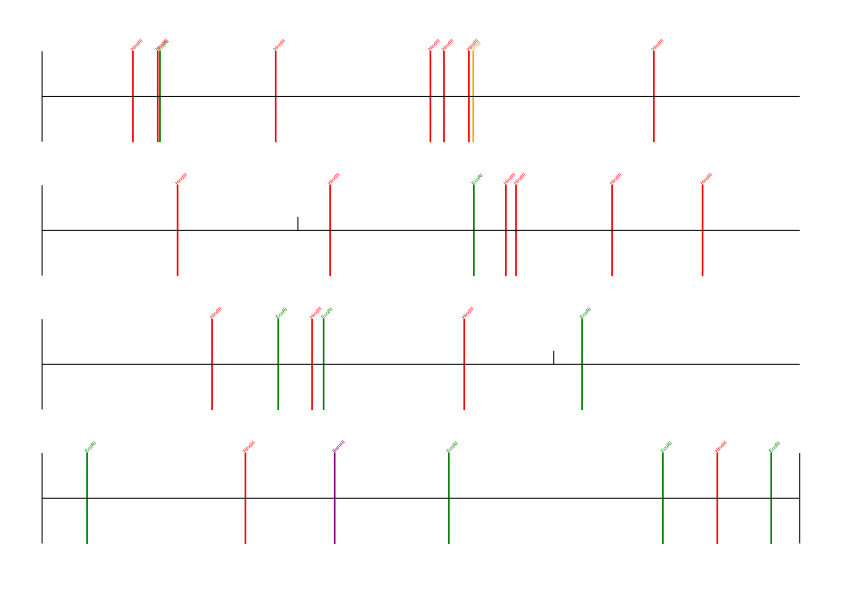

In [20]:
Image("covid.png")